In [ ]:
# Name : Abdulaziz Alzahrani


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image


In [ ]:
# Download the file using gdown
!gdown --id 1X1wDxH1X8RRwwudD9YG2paOqtL3woCsJ -O reshaped_mnist.zip

# Unzip the file
!unzip reshaped_mnist.zip

Streaming output truncated to the last 5000 lines.
 extracting: reshaped_mnist/12074_9.png  
 extracting: reshaped_mnist/35503_9.png  
 extracting: reshaped_mnist/50460_5.png  
 extracting: reshaped_mnist/8127_9.png  
 extracting: reshaped_mnist/9284_2.png  
 extracting: reshaped_mnist/48391_2.png  
 extracting: reshaped_mnist/53674_4.png  
 extracting: reshaped_mnist/20296_7.png  
  inflating: reshaped_mnist/25503_4.png  
 extracting: reshaped_mnist/50301_5.png  
 extracting: reshaped_mnist/50447_1.png  
 extracting: reshaped_mnist/18358_7.png  
 extracting: reshaped_mnist/59876_6.png  
 extracting: reshaped_mnist/48049_5.png  
 extracting: reshaped_mnist/16552_8.png  
 extracting: reshaped_mnist/12648_8.png  
 extracting: reshaped_mnist/31023_8.png  
 extracting: reshaped_mnist/42158_2.png  
 extracting: reshaped_mnist/429_0.png  
 extracting: reshaped_mnist/7680_9.png  
 extracting: reshaped_mnist/14087_3.png  
 extracting: reshaped_mnist/33553_5.png  
  inflating: reshaped_mnist/54

In [ ]:
!gdown --id 1uPlA-pbks1XrRyA1hgLPh1rzW7pMK0px -O image_positions.csv


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uPlA-pbks1XrRyA1hgLPh1rzW7pMK0px
To: /content/image_positions.csv
100% 1.41M/1.41M [00:00<00:00, 103MB/s]


  Filepath  Top_Left_X  Top_Left_Y  Width  Height
0  0_5.png          18           3     28      56
1  1_0.png           4          24     56      28
2  2_4.png           1          21     56      28
3  3_1.png          24           4     28      56
4  4_9.png          17           2     28      56


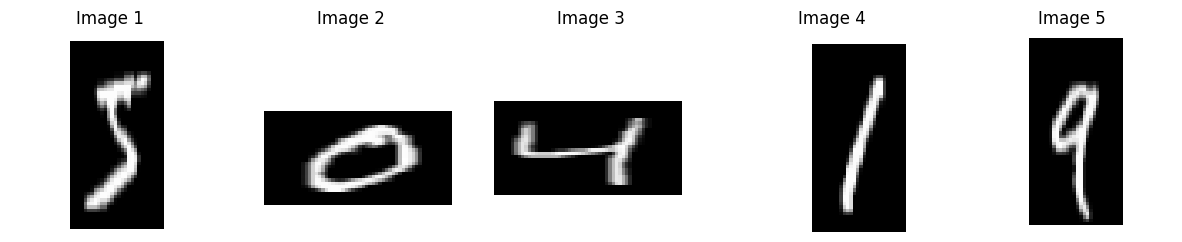

In [ ]:
import numpy as np
# Load the CSV file
df = pd.read_csv('image_positions.csv')

# Display the first 5 rows of the dataframe
print(df.head(5))

# Assuming 'Filepath' column contains the relative image paths
image_dir = 'reshaped_mnist/'

# Read and display the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, row in df.head(5).iterrows():
    filepath = os.path.join(image_dir, row['Filepath'])
    image = np.array(Image.open(filepath))
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.show()


# Exercise: Image Preprocessing and CNN Model Development
## Objective:
In this exercise, you are tasked with developing a Convolutional Neural Network (CNN) model to classify images based on a provided dataset. The images are contained within a larger white background, and their actual dimensions vary between two sizes: 28x56 pixels and 56x28 pixels. Your challenge involves multiple steps, including data preprocessing, dataset creation, and CNN model development.

## Dataset Description:
The dataset is defined in a CSV file named image_positions.csv, which includes the following columns:

- Filepath: The filename of the image, with the label after the "_"
- Top_Left_X: The top-left X-coordinate of the image within the larger background.
- Top_Left_Y: The top-left Y-coordinate of the image within the larger background.
- Width: The width of the actual image.
- Height: The height of the actual image.


Sample is shown above

Images are embedded into a larger white
canvas and need to be cropped to remove the white background and standardized in size for model input.

# Tasks:
## Data Preprocessing:

- Read the CSV file and for each image, crop it according to the specified coordinates and dimensions to remove the white background.
- Standardize the size of the images for the CNN model to (28 by 28) by downsampling with a factor of 2 the image along the dimesion with size 56. (you should write your own code for it, you can simply skip every second row/column to achieve this)
- Display a batch of the cropped and downsampled (28 by 28) image.
  
## Dataset Preparation:

- Split your preprocessed images into training and testing datasets. Ensure you have a balanced distribution of classes in both sets.
- Implement data augmentation techniques if necessary to increase the diversity of your training dataset and improve model robustness.

## CNN Model Development:

- Design and implement a CNN model architecture of your choice to classify the images into their respective categories.
- Compile and train your model using the training dataset. Choose an appropriate loss function and optimizer for the classification task.
- Evaluate your model's performance on the testing dataset. Provide insights into its accuracy and potential areas for improvement.

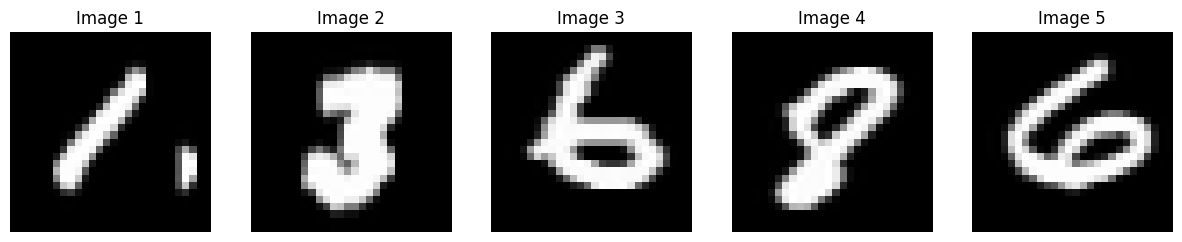

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


df = pd.read_csv('image_positions.csv')

output_size = (28, 28)

class CustomDataset(Dataset):
    def __init__(self, df , root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.df.iloc[idx, 0])
        image = Image.open(img_name)
        label = int(self.df.iloc[idx, 0].split('_')[1][0])
        top_left_x = self.df.iloc[idx, 1]
        top_left_y = self.df.iloc[idx, 2]
        width = self.df.iloc[idx, 3]
        height = self.df.iloc[idx, 4]
        image = image.crop((top_left_x, top_left_y, top_left_x + width, top_left_y + height))
        image = image.resize(output_size, Image.LANCZOS)

        if self.transform:
            image = self.transform(image)

        return image, label

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Filepath'].apply(lambda x: x.split('_')[1][0]), random_state=42)

data_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert('RGB') if x.mode != 'RGB' else x),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(train_df, 'reshaped_mnist', transform=data_transform)
test_dataset = CustomDataset(test_df, 'reshaped_mnist', transform=data_transform)

batch_size = 5
fig, axes = plt.subplots(1, batch_size, figsize=(15, 3))
for i in range(batch_size):
    image, label = train_dataset[i]
    axes[i].imshow(image.permute(1, 2, 0))
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.show()


In [ ]:
print("Training set class distribution:")
print(train_df['Filepath'].apply(lambda x: x.split('_')[1][0]).value_counts())
print("\nTesting set class distribution:")
print(test_df['Filepath'].apply(lambda x: x.split('_')[1][0]).value_counts())

Training set class distribution:
1    5394
7    5012
3    4905
2    4766
9    4759
0    4738
6    4734
8    4681
4    4674
5    4337
Name: Filepath, dtype: int64

Testing set class distribution:
1    1348
7    1253
3    1226
2    1192
9    1190
0    1185
6    1184
8    1170
4    1168
5    1084
Name: Filepath, dtype: int64


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64* 3 * 3, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.softmax(self.fc2(x), dim=1)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(3):
    print(f"Epoch {epoch+1}/3, Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(test_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

print("Training and Validation metrics:")
print("Train Loss:", train_losses)
print("Train Accuracy:", train_accuracies)
print("Validation Loss:", val_losses)
print("Validation Accuracy:", val_accuracies)

Epoch 1/3, Learning Rate: 0.001000
Epoch 2/3, Learning Rate: 0.001000
Epoch 3/3, Learning Rate: 0.001000
Training and Validation metrics:
Train Loss: [1.6951950461069742, 1.5246633715629578, 1.5083923727671305]
Train Accuracy: [0.768375, 0.9382291666666667, 0.9533125]
Validation Loss: [1.5124056472423228, 1.494542787049679, 1.4940044315571481]
Validation Accuracy: [0.9493333333333334, 0.9664166666666667, 0.9673333333333334]


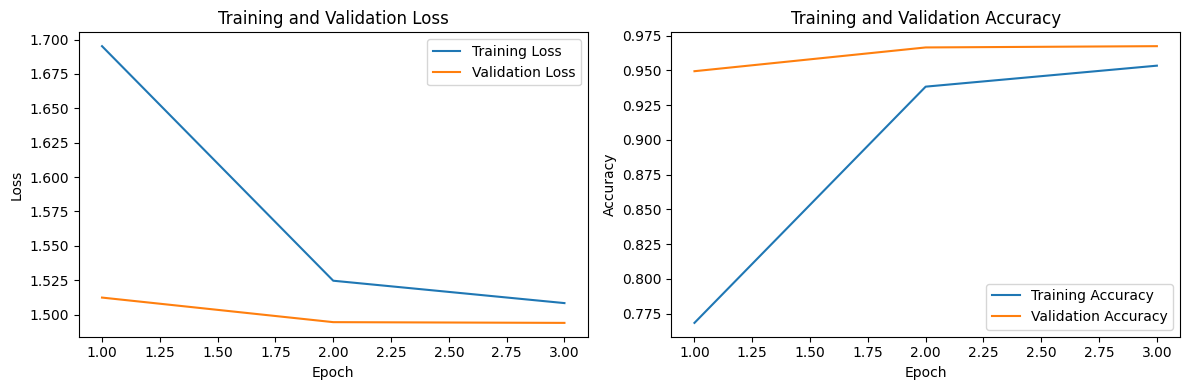

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
predicted_labels = []
true_labels = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

print("True Labels:", true_labels[:10])
print("Predicted Labels:", predicted_labels[:10])


True Labels: [7, 7, 3, 5, 6, 9, 6, 6, 7, 2]
Predicted Labels: [7, 7, 3, 5, 6, 9, 6, 6, 7, 8]
